<html>
    <h1 style="color:#52abec">Import Libraries</h1>
</html>

In [1]:
import numpy as np
import pandas as pd

<html>
<h1 style="color:#52abec">Import datasets and Preprocessing</h1>
    </html>

In [244]:
train_data = pd.read_csv("Datasets/Loan_Prediction_Train.csv")
test_data = pd.read_csv("Datasets/Loan_Prediction_Test.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Let check info data type of each features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# check shape of dataset
train_data.shape

(614, 13)

In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Property frequency table
train_data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

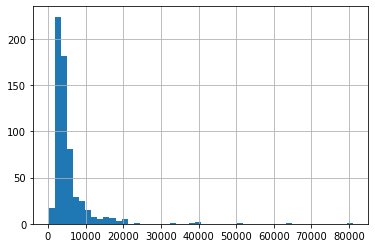

In [8]:
# let distribustion plot(histogram) for ApplicantIncome
train_data["ApplicantIncome"].hist(bins = 50)

<AxesSubplot:>

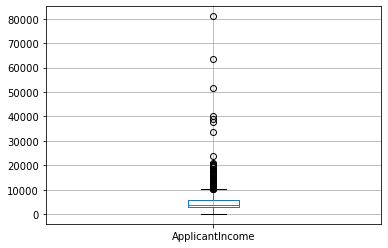

In [9]:
# let us create box plot for ApplicantIncome
train_data.boxplot(column = "ApplicantIncome")

<AxesSubplot:>

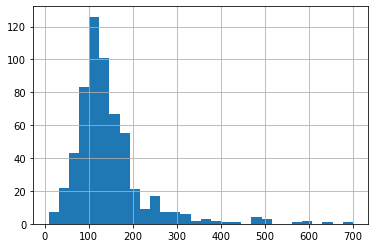

In [10]:
# Loan amount 
train_data["LoanAmount"].hist(bins = 30)

<AxesSubplot:>

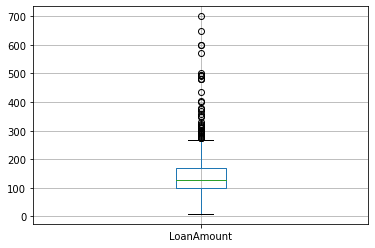

In [11]:
# there is positive skew in Loan Amount
train_data.boxplot(column = "LoanAmount")

In [12]:
# check null values in each columns
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<html>
<h1 style="color:#52abec">There is some column which has null values.columns names are as belows:</h1>
<table align="left"; style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="background-color:#009901;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Sr_No</th><th style="background-color:#009901;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Row_Name</th><th style="background-color:#009901;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Data_Type</th><th style="background-color:#009901;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">No_Of_Null_Values</th></tr></thead><tbody><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">1</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Gender</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">object</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">13</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">2</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Married<br></td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">object</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">3</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">3</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Dependents<br></td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">object</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">15</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">4</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Self_Employed</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">object</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">32</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">5</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">LoanAmount</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">float64</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">22</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">6</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Loan_Amount_Term</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">float64</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">14</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">7</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Credit_History</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">float64</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">50</td></tr></tbody></table>
 </html>

In [13]:
# check null value %
((train_data.isnull().sum().sum())/train_data.size) *100

1.8667000751691305

In [14]:
# let remove Loan_ID as it is not important feature
train_data = train_data.drop("Loan_ID", axis = 1)

In [15]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(train_data.dtypes):
    if c == object:
        cat_data.append(train_data.iloc[:, i])
    else :
        num_data.append(train_data.iloc[:, i])

In [17]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [18]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [19]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [21]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [23]:
# num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder  
label_encoder = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [25]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [26]:
# transform other columns

for i in cat_data:
    cat_data[i] = label_encoder.fit_transform(cat_data[i])

In [27]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [118]:
train_data= pd.concat([cat_data, num_data, target], axis=1)

In [119]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,1
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,0


In [120]:
# i shuffled the data 
train_data=train_data.sample(frac=1)

<html>
    <h1 style="color:#52abec">Feature Engineering</h1>
</html>

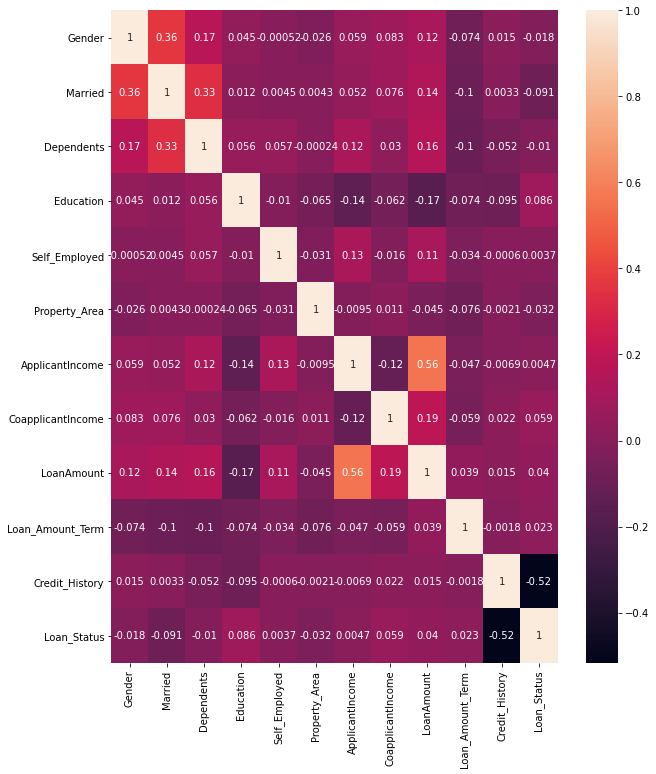

In [121]:
 # let us create correlation matirx
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [122]:
# as creadit history and married feature is important feature
# loan amount and applicant feature is highly correlated feature

In [123]:
# let create new feature total income
train_data["ratio_income"] = train_data["CoapplicantIncome"]/ train_data["ApplicantIncome"]

In [124]:
# let us drop ApplicantIncome and CoapplicantIncome
train_data = train_data.drop(["ApplicantIncome","CoapplicantIncome"],axis = 1)

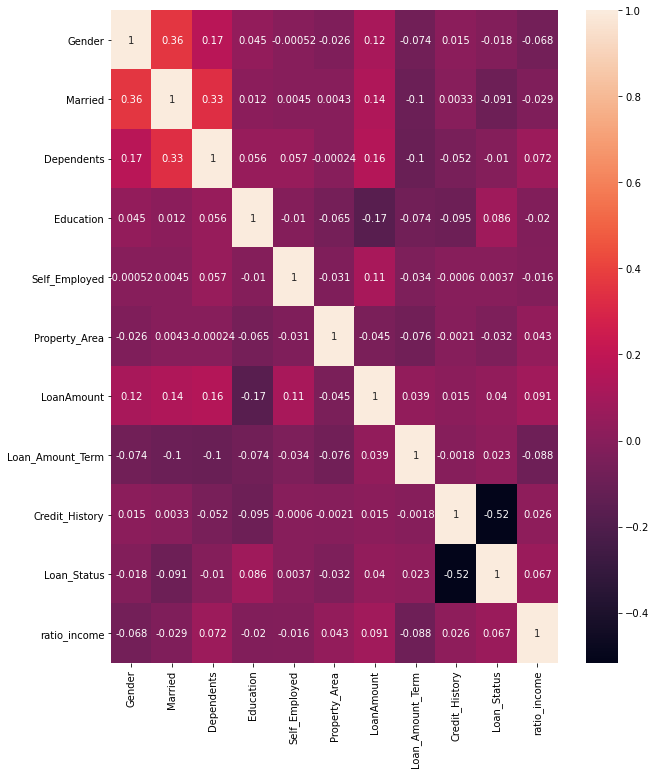

In [125]:
plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [126]:
train_data["loan_per_term"] = train_data["LoanAmount"] * train_data["Loan_Amount_Term"]

In [127]:
# let us drop LoanAmount and Loan_Amount_Term
train_data = train_data.drop(["LoanAmount","Loan_Amount_Term"],axis = 1)

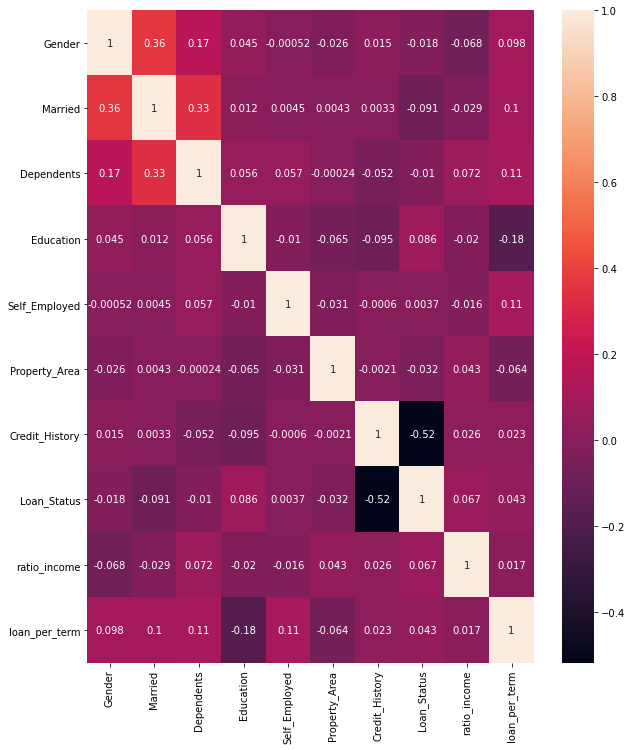

In [128]:
plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [130]:
# let check counts of every categorical column

for i in range(train_data.shape[1]):
    print(train_data.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    502
0    112
Name: Gender, dtype: int64
------------------------------------------------
1    401
0    213
Name: Married, dtype: int64
------------------------------------------------
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
------------------------------------------------
0    480
1    134
Name: Education, dtype: int64
------------------------------------------------
0    532
1     82
Name: Self_Employed, dtype: int64
------------------------------------------------
1    233
2    202
0    179
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    517
0.0     97
Name: Credit_History, dtype: int64
------------------------------------------------
0    422
1    192
Name: Loan_Status, dtype: int64
------------------------------------------------
0.000000    273
0.735294      2
0.565659      2
0.543943      1
0.723670      1
           ... 
0.357699      1
0.121338      1
0.558776      1
0.725705      1
0.283620      1
Name: 

<AxesSubplot:xlabel='loan_per_term', ylabel='Count'>

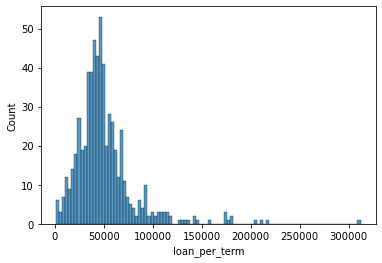

In [129]:
# let see histogram for loan_per_term

sns.histplot(train_data["loan_per_term"] , bins = 100)

<AxesSubplot:xlabel='loan_per_term', ylabel='Count'>

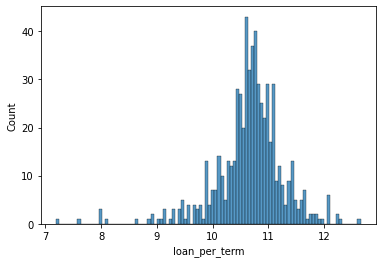

In [131]:
# loan_per _term is right skewed as shown here so let transfer to log
train_data["loan_per_term"]  = np.log(train_data["loan_per_term"])

# again histogram

sns.histplot(train_data["loan_per_term"] , bins = 100)

In [132]:
# for  ratio_income fearue 
train_data["ratio_income"].value_counts()

0.000000    273
0.735294      2
0.565659      2
0.543943      1
0.723670      1
           ... 
0.357699      1
0.121338      1
0.558776      1
0.725705      1
0.283620      1
Name: ratio_income, Length: 340, dtype: int64

In [134]:
# there is most of value is 0 so let try to change others to 1 ( roundup)
train_data['ratio_income'] = [x if x==0 else 1 for x in train_data['ratio_income']]
print('-'*50)
print('\nafter:')
print(train_data['ratio_income'].value_counts())

--------------------------------------------------

after:
1.0    341
0.0    273
Name: ratio_income, dtype: int64


In [135]:
# now it's look good for ratio_income

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


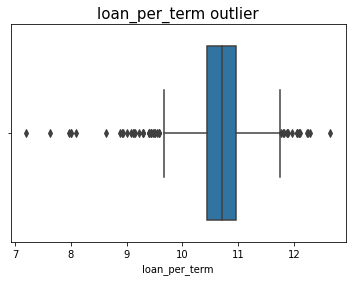

In [136]:
# we will treat outliers for some features
sns.boxplot(train_data["loan_per_term"])
plt.title("loan_per_term outlier",fontsize = 15)

plt.show()

In [137]:
# # this number is hyper parameter , as much as you reduce it, as much as you remove more points. you can try differnet value
threshold = 1.5  
loan_per_term_out = train_data['loan_per_term']
q25, q75 = np.percentile(loan_per_term_out, 25), np.percentile(loan_per_term_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in loan_per_term_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

train_data = train_data.drop(train_data[(train_data['loan_per_term'] > upper) | (train_data['loan_per_term'] < lower)].index)

print('len X_train before dropping the outliers', len(train_data))

Quartile 25: 10.439980923050696 , Quartile 75: 10.967508396434619
iqr: 0.5275274733839233
Cut Off: 0.7912912100758849
Lower: 9.64868971297481
Upper: 11.758799606510504
Nubers of Outliers: 49
outliers:[9.469622969906265, 12.059890135352092, 11.889991098556695, 12.231740392278752, 9.51044496442652, 9.21830854162536, 9.392661928770137, 9.578311275656766, 8.930626469173578, 9.441452092939569, 12.059890135352092, 8.881836305004146, 9.441452092939569, 7.194436851100335, 9.549665677579801, 8.626944055375356, 11.96374627479919, 9.112948025967533, 12.65075846679162, 12.090661794018846, 9.400630098419315, 11.772208062900312, 8.99961934066053, 9.287301413112312, 9.287301413112312, 9.144200569471638, 9.574983485564092, 12.092679958175083, 12.254862809699606, 9.483416292038601, 11.877568578558138, 12.059890135352092, 12.283033686666302, 9.441452092939569, 9.287301413112312, 9.587406005562649, 7.965545573129992, 12.100712129872347, 8.922658299524402, 9.137769679141348, 8.006367567650246, 11.79960703

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


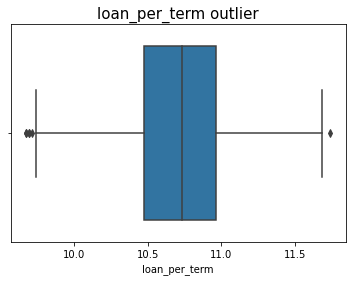

In [138]:
sns.boxplot(train_data["loan_per_term"])
plt.title("loan_per_term outlier",fontsize = 15)

plt.show()

# it looks good now

<html>
    <h1 style="color:#52abec">Feature selection</h1>
</html>

<AxesSubplot:>

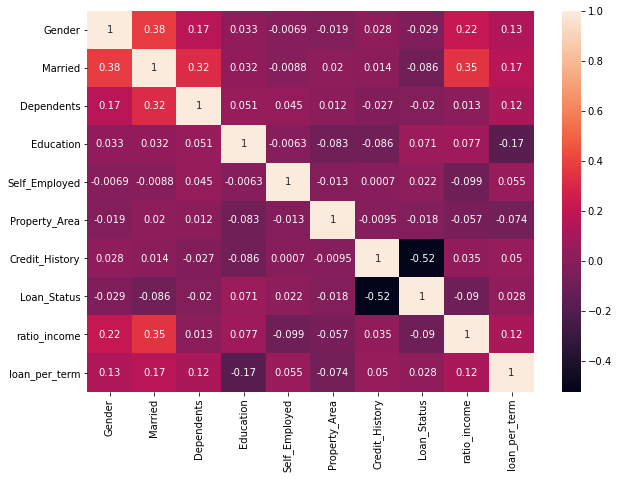

In [139]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True)

In [284]:
# self employed has very bad correlation matrix let's drop that column
train_data = train_data.drop("Self_Employed",axis = 1)
train_data = train_data.drop("Loan_ID",axis = 1)

<AxesSubplot:>

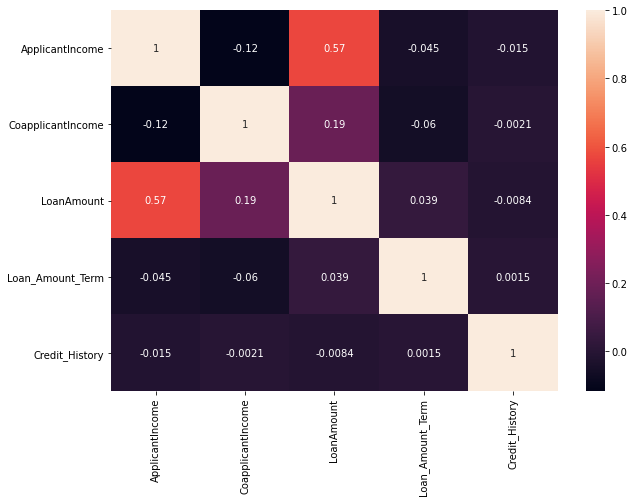

In [285]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True)

<html>
    <h1 style="color:#52abec">Let us prepair Train and test data for model</h1>
</html>

In [286]:
Y = train_data["Loan_Status"]
X = train_data.drop("Loan_Status",axis = 1)

In [287]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [288]:
x_train

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,6000,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,2958,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,6250,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,2083,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,4166,0.0,98.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...
71,Male,Yes,2,Not Graduate,1875,1875.0,97.0,360.0,1.0,Semiurban
106,Male,Yes,2,Graduate,11417,1126.0,225.0,360.0,1.0,Urban
270,Female,No,0,Graduate,3237,0.0,30.0,360.0,1.0,Urban
435,Female,NaN,NaN,Graduate,10047,0.0,NaN,240.0,1.0,Semiurban


In [148]:
# let us create Logistic regression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state = 42)


In [149]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [150]:
# PREDICITING FROM THE MODEL
y_pred_logistic = logistic_model.predict(x_test)

In [153]:
# ACCURACY
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("ACCURACY of logistic model is:", accuracy_score(y_test, y_pred_logistic))

ACCURACY of logistic model is: 0.8230088495575221


In [155]:
# let us check classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        81
           1       0.80      0.50      0.62        32

    accuracy                           0.82       113
   macro avg       0.81      0.73      0.75       113
weighted avg       0.82      0.82      0.81       113



<AxesSubplot:>

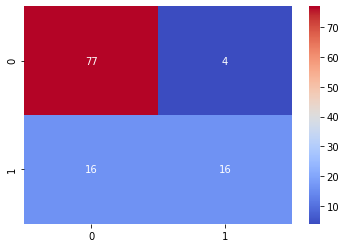

In [159]:
# let us check confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cf_matrix, annot=True,cmap="coolwarm")

In [174]:
# let us train model using random forest
from sklearn.ensemble import RandomForestClassifier

In [175]:
random_forest_model = RandomForestClassifier(n_estimators=100)


In [176]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [177]:
# PREDICITING FROM THE MODEL
y_pred_rf = random_forest_model.predict(x_test)

In [178]:
# accuracy
print("ACCURACY of random forest model is:", accuracy_score(y_test, y_pred_rf))

ACCURACY of random forest model is: 0.7876106194690266


In [179]:
# hyper parameter tunning
# IMPORTING Libraries
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [180]:
# GETTING PARAMETERS DICTIONARY
params_grid = {
    "n_estimators" : [100,200,300,400,500],
    "max_depth": [1,2,3,4,5],
    "min_samples_leaf" : [1,2,3,4,5],
    "bootstrap" : [True,False],
    }

In [181]:
# RANDOM FOREST CLASSIFIER INSTANCE
clf = RandomForestClassifier()
grid_search_cv = GridSearchCV(random_forest_model,params_grid,cv=5)
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [182]:
# GETTING BEST ESTIMATOR
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=4)

In [184]:
random_forest_model = RandomForestClassifier(max_depth=5, min_samples_leaf=4)
# fitting the model
clf.fit(x_train,y_train)

RandomForestClassifier()

In [185]:
# PRedicitng from the model
y_pred_rf = clf.predict(x_test)

In [187]:
# Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7876106194690266


In [251]:
# let us prepare test data
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ratio_income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.000000
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0.487646
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0.360000
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1.088034
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0.000000


In [252]:
cat_data_test = []
num_data_test = []

for i,c in enumerate(test_data.dtypes):
    if c == object:
        cat_data_test.append(test_data.iloc[:, i])
    else :
        num_data_test.append(test_data.iloc[:, i])

In [254]:
cat_data_test = pd.DataFrame(cat_data_test).transpose()
num_data_test = pd.DataFrame(num_data_test).transpose()

In [255]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data_test = cat_data_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [256]:
# num_data
# fill every missing value with their previous value in the same column

num_data_test.fillna(method='bfill', inplace=True)

In [257]:
num_data_test["ratio_income"] = num_data_test["CoapplicantIncome"]/ num_data_test["ApplicantIncome"]

In [258]:
num_data_test["loan_per_term"] = num_data_test["LoanAmount"] * num_data_test["Loan_Amount_Term"]

In [259]:
num_data_test = num_data_test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis = 1)
num_data_test.head()

,Credit_History,ratio_income,loan_per_term
0,1.0,0.000000,39600.0
1,1.0,0.487646,45360.0
2,1.0,0.360000,74880.0
3,1.0,1.088034,36000.0
4,1.0,0.000000,28080.0


In [260]:
cat_data_test = cat_data_test.drop("Self_Employed",axis = 1)
cat_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Property_Area
0,LP001015,Male,Yes,0,Graduate,Urban
1,LP001022,Male,Yes,1,Graduate,Urban
2,LP001031,Male,Yes,2,Graduate,Urban
3,LP001035,Male,Yes,2,Graduate,Urban
4,LP001051,Male,No,0,Not Graduate,Urban


In [261]:
num_data_test["loan_per_term"]  = np.log(num_data_test["loan_per_term"])

In [264]:
num_data_test.head()

,Credit_History,ratio_income,loan_per_term
0,1.0,0.0,10.586584
1,1.0,1.0,10.722386
2,1.0,1.0,11.223642
3,1.0,1.0,10.491274
4,1.0,0.0,10.242813


In [263]:
# there is most of value is 0 so let try to change others to 1 ( roundup)
num_data_test['ratio_income'] = [x if x==0 else 1 for x in num_data_test['ratio_income']]
print('-'*50)
print('\nafter:')
print(num_data_test['ratio_income'].value_counts())

--------------------------------------------------

after:
1.0    211
0.0    156
Name: ratio_income, dtype: int64


In [272]:
# transform other columns
for i in cat_data_test:
    if  i == "Loan_ID" :
        pass
    else :
        cat_data_test[i] = label_encoder.fit_transform(cat_data_test[i])

In [273]:
cat_data_test

,Loan_ID,Gender,Married,Dependents,Education,Property_Area
0,LP001015,1,1,0,0,2
1,LP001022,1,1,1,0,2
2,LP001031,1,1,2,0,2
3,LP001035,1,1,2,0,2
4,LP001051,1,0,0,1,2
...,...,...,...,...,...,...
362,LP002971,1,1,3,1,2
363,LP002975,1,1,0,0,2
364,LP002980,1,0,0,0,1
365,LP002986,1,1,0,0,0


In [274]:
test_data= pd.concat([cat_data_test, num_data_test], axis=1)

In [275]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Property_Area,Credit_History,ratio_income,loan_per_term
0,LP001015,1,1,0,0,2,1.0,0.0,10.586584
1,LP001022,1,1,1,0,2,1.0,1.0,10.722386
2,LP001031,1,1,2,0,2,1.0,1.0,11.223642
3,LP001035,1,1,2,0,2,1.0,1.0,10.491274
4,LP001051,1,0,0,1,2,1.0,0.0,10.242813


In [276]:
test_data.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Property_Area     0
Credit_History    0
ratio_income      0
loan_per_term     0
dtype: int64

In [289]:
X_test = test_data.drop("Loan_ID",axis = 1)

In [295]:
# PREDICITING FROM THE MODEL
test_data["Loan_Status"] = logistic_model.predict(X_test)

,Loan_ID,Gender,Married,Dependents,Education,Property_Area,Credit_History,ratio_income,loan_per_term,Loan_Status
7,LP001056,1,1,2,1,0,0.0,0.0,10.876537,1
12,LP001083,1,0,3,0,2,0.0,0.0,8.881836,1
13,LP001094,1,1,2,0,1,0.0,0.0,10.998092,1
25,LP001153,1,0,0,0,0,0.0,1.0,10.883316,1
35,LP001203,1,0,0,0,1,0.0,0.0,11.056588,1
...,...,...,...,...,...,...,...,...,...,...
311,LP002747,0,0,3,0,0,0.0,1.0,10.916542,1
317,LP002774,1,1,0,1,2,0.0,1.0,10.090797,1
339,LP002858,0,0,0,0,0,0.0,1.0,10.973700,1
346,LP002879,1,1,0,0,0,0.0,1.0,10.776453,1


In [301]:
test_data_write = test_data[["Loan_ID","Loan_Status"]]
test_data_write["Loan_Status"] = test_data_write["Loan_Status"].map({0:"N",1:"Y"})

<ipython-input-301-276dcd0eed85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_write["Loan_Status"] = test_data_write["Loan_Status"].map({0:"N",1:"Y"})


In [302]:
test_data_write

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [303]:
test_data_write.to_csv("loan_prediction.csv")

In [304]:
test_data["Loan_Status_rf"] = clf.predict(X_test)
test_data_write = test_data[["Loan_ID","Loan_Status_rf"]]
test_data_write["Loan_Status_rf"] = test_data_write["Loan_Status_rf"].map({0:"N",1:"Y"})

<ipython-input-304-85faf58a0f9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_write["Loan_Status_rf"] = test_data_write["Loan_Status_rf"].map({0:"N",1:"Y"})


In [305]:
test_data_write

,Loan_ID,Loan_Status_rf
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,Y


In [306]:
test_data_write.to_csv("loan_prediction_rf.csv")